## 210968002 
## Sagar Kumar
## Week 3
## Exercise 2 - Perform data analysis and visualization on the movies.csv data set and answer the given questions.

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv("bollywood.csv")
df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


### Q1)  How many records are present in the dataset?

In [74]:
df.shape[0]

149

### Q2)  How many movies got released in each genre? Sort number of releases in each genre in descending order.

In [75]:
df["Genre"] = df["Genre"].str.strip()
df["Genre"].value_counts().sort_values(ascending=False)

Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64

### Q3) Which genre had highest number of releases?

In [76]:
df.Genre.value_counts().idxmax()

'Comedy'

### Q4)  How many movies in each genre got released in different release times like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.)

In [77]:
pd.crosstab(df.Genre, df.ReleaseTime)

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


### Q5)  Which month of the year, maximum number movie releases are seen? (Note: Extract a new column called month from ReleaseDate column.)

In [78]:
# To convert release date into datetime datatype
df["Release Date"] = pd.to_datetime(df["Release Date"])
df["Month"] = df["Release Date"].dt.month

df["Month"].value_counts().idxmax()

1

### Q6)  Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?

In [79]:
df[df.Budget > 25]["Month"].value_counts().idxmax()

2

### Q7)  Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget.

In [80]:
df["ROI"] = (df.BoxOfficeCollection - df.Budget) / df.Budget
df.sort_values('ROI').tail(10)["MovieName"]

115              Chennai Express
101           Bhaag Milkha Bhaag
37     Humpty Sharma Ki Dulhania
128                       Shahid
58                      Mary Kom
87                        Fukrey
135                 The Lunchbox
132                  Grand Masti
89                            PK
64                    Aashiqui 2
Name: MovieName, dtype: object

### Q8) Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times

In [81]:
print(df.loc[df["ReleaseTime"] == "FS", "ROI"].mean())
print(df.loc[df["ReleaseTime"] == "LW", "ROI"].mean())
print("From the above calculations, movies have higher ROI if they get released on long weekends")

0.9738532013595953
1.1272053098737973
From the above calculations, movies have higher ROI if they get released on long weekends


### Q9) Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?

                     BoxOfficeCollection  YoutubeLikes
BoxOfficeCollection             1.000000      0.682517
YoutubeLikes                    0.682517      1.000000

There is a positive correlation between the box office collection and youtube likes.


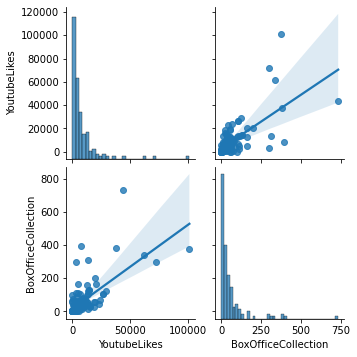

In [82]:
print(df[["BoxOfficeCollection", "YoutubeLikes"]].corr())
sns.pairplot(df[["YoutubeLikes", "BoxOfficeCollection"]], kind="reg")
print("\nThere is a positive correlation between the box office collection and youtube likes.")

### Q10) Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.

The genre with most number of YouTube likes is: Action


<AxesSubplot:xlabel='Genre', ylabel='YoutubeLikes'>

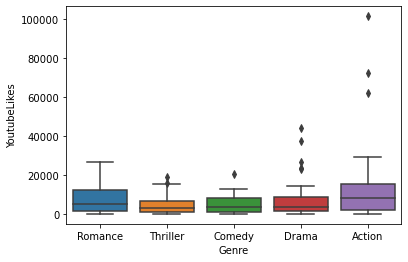

In [92]:
print("The genre with most number of YouTube likes is: " + df.groupby(["Genre"])["YoutubeLikes"].sum().idxmax())
sns.boxplot(x="Genre", y="YoutubeLikes", data=df)

### Q11) Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated? Note: Draw pair plot or heatmap.

YoutubeLikes and YoutubeDislikes seem to be highly correlated


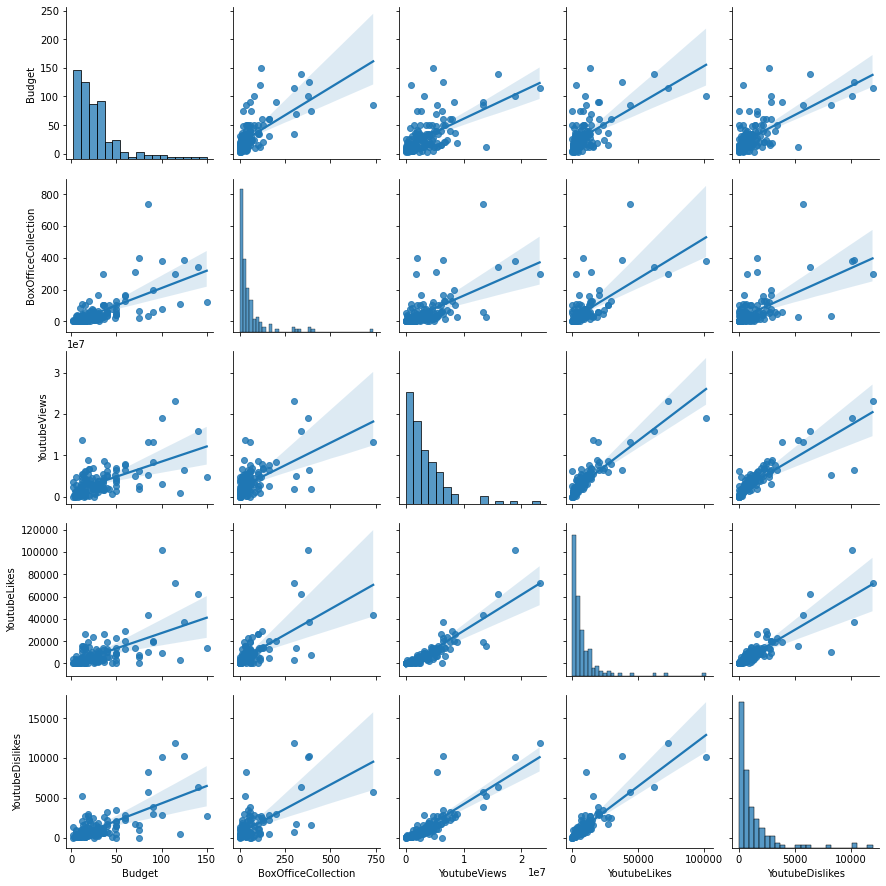

In [84]:
sns.pairplot(df[["Budget", "BoxOfficeCollection", "YoutubeViews", "YoutubeLikes", "YoutubeDislikes"]], kind='reg')
print("YoutubeLikes and YoutubeDislikes seem to be highly correlated")

### 12) During 2013−2015 period, highlight the genre of movies and their box office collection? Visualize with best fit graph

Genre
Action      2200.34
Comedy      1660.14
Drama       2302.76
Romance     1321.03
Thriller     810.15
Name: BoxOfficeCollection, dtype: float64


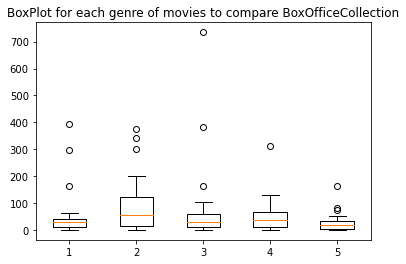

In [95]:
print(df.groupby(df["Genre"])['BoxOfficeCollection'].sum())

comedy = df.loc[df["Genre"]=='Comedy', "BoxOfficeCollection"]
action = df.loc[df["Genre"]=='Action', "BoxOfficeCollection"]
drama = df.loc[df["Genre"]=='Drama', "BoxOfficeCollection"]
romance = df.loc[df["Genre"]=='Romance', "BoxOfficeCollection"]
thriller = df.loc[df["Genre"]=='Thriller', "BoxOfficeCollection"]

plt.boxplot([comedy,action,drama,romance,thriller])
plt.title("BoxPlot for each genre of movies to compare BoxOfficeCollection")
plt.show()

### 13) Visualize the Budget and Box office collection based on Genre

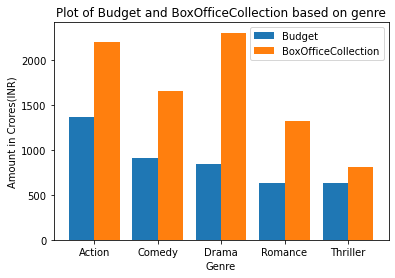

,Budget,BoxOfficeCollection
Genre,,
Action,1367,2200.34
Comedy,910,1660.14
Drama,847,2302.76
Romance,629,1321.03
Thriller,634,810.15


In [109]:
import numpy as np

temp_df = df.groupby(df["Genre"]).sum()
x_labels = ["Action","Comedy",'Drama','Romance','Thriller']
y = temp_df["Budget"]
z = temp_df["BoxOfficeCollection"]
  
x = np.arange(len(x_labels))
  
plt.bar(x - 0.2, y, 0.4, label = 'Budget')
plt.bar(x + 0.2, z, 0.4, label = 'BoxOfficeCollection')
  
plt.xticks(x, x_labels)
plt.xlabel("Genre")
plt.ylabel("Amount in Crores(INR)")
plt.title("Plot of Budget and BoxOfficeCollection based on genre")
plt.legend()
plt.show()

temp_df[["Budget", "BoxOfficeCollection"]]

### 14) Find the distribution of movie budget for every Genre

Genre
Action      1367
Comedy       910
Drama        847
Romance      629
Thriller     634
Name: Budget, dtype: int64


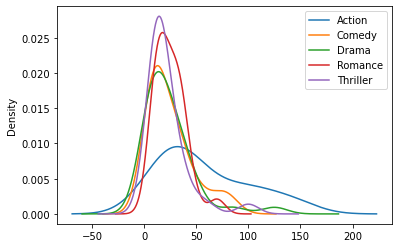

In [89]:
print(df.groupby(df["Genre"])['Budget'].sum())

df.groupby('Genre')["Budget"].plot(kind='density')
plt.legend()
plt.show()

### 15) During 2013−2015, find the number of movies released in every year. Also, visualize with best fit graph

,Release Date
2014,70
2013,67
2015,12


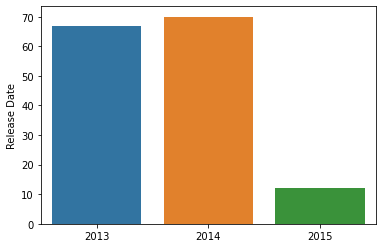

In [ ]:
temp_df = pd.DataFrame(df['Release Date'].dt.year.value_counts())
sns.barplot(x=temp_df.index, y=temp_df['Release Date'])
temp_df